In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

Neste notebook temos a intenção de gerar uma curva Receiver Operator Characteristic, ou curva ROC. Ela pode ajudar a decidir qual valor do limite (threshold) é o melhor.

>A sensibilidade, ou taxa positiva verdadeira do modelo, é mostrada no eixo y.

>E a taxa de falsos positivos, ou 1 menos a especificidade, é dada no eixo x.

A linha mostra como essas duas medidas de resultados variam com diferentes valores de limite.

*A curva ROC sempre começa no ponto (0, 0).*

**Isso corresponde a um valor limite de 1.**

Se você tiver um limite de 1, não detectará nenhum caso de atendimento inadequado ou terá uma sensibilidade de 0.

Mas você rotulará corretamente todos os casos de bom atendimento, o que significa que você tem uma taxa de falsos positivos de 0.

**Quanto mais alto o limite, ou mais próximo de (0, 0), maior a especificidade e menor a sensibilidade.**

**Quanto menor o limite, ou mais próximo de (1,1), maior a sensibilidade e menor a especificidade.**

Se precisa ter uma alta especificidade ou baixa taxa de falsos positivos, escolha o limite que maximiza a taxa de verdadeiros positivos enquanto mantém a taxa de falsos positivos realmente baixa.

Por outro lado, se precisar de uma alta sensibilidade ou taxa de verdadeiro positivo alta, escolha um limite que minimize a taxa de falso positivo, mas tenha uma taxa de verdadeiro positivo muito alta.

In [ ]:
sloan= pd.read_csv('/content/sloan10')

In [ ]:
sloan.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
def dataset(da1):
  if da1=='STAR':
    return 1
  elif da1=='GALAXY':
    return 2
  else :
    return 3

In [ ]:
sloan['classtarget'] = sloan['class'].apply(dataset)

sloan

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,classtarget
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491,1
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541,1
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513,2
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510,1
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246,2
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228,2
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622,1
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229,2


In [ ]:
#defina as variáveis ​​preditoras (X) e a variável de resposta (y)

X=sloan[['r','u','i','z','g']]
y=sloan['classtarget']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [ ]:
#FEATURE SCALING
#import numpy as np
#from sklearn.preprocessing import StandardScaler


#y_train= np.reshape(y_train,(-1, 1))
#y_test= np.reshape(y_test, (-1, 1))

#sc_y= StandardScaler()
#y_train1= sc_y.fit_transform(y_train)
#y_test1= sc_y.transform(y_test)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
y_train_class = (y_train == 1) # Verdadeiro para estrelas, falso p td o resto
y_test_class = (y_test == 1)

In [ ]:
# ajustar o modelo usando os dados de treinamento

log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#definindo a metrica

y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_class,  y_pred_proba)

**Quanto mais a curva envolver o canto superior esquerdo do gráfico, melhor será o modelo de classificação dos dados em categorias.**

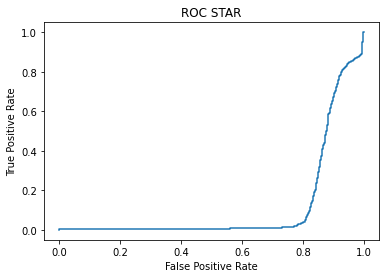

In [ ]:
#criando a curva ROC
plt.title('ROC STAR')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_train_class = (y_train == 2) # Verdadeiro para galáxias, falso p td o resto
y_test_class = (y_test == 2)

In [ ]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#definindo a metrica
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_class,  y_pred_proba)


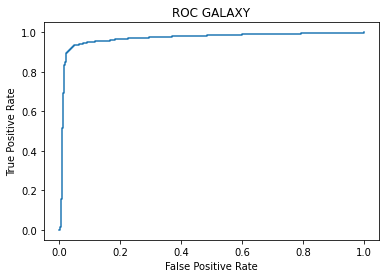

In [ ]:
#criando a curva ROC

plt.title('ROC GALAXY')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_train_class = (y_train == 3) # Verdadeiro para quasares, falso p td o resto
y_test_class = (y_test == 3)

In [ ]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#definindo métrica
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_class,  y_pred_proba)

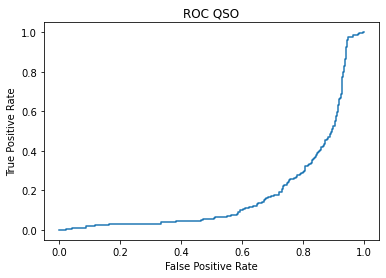

In [ ]:
#criando a curva ROC

plt.title('ROC QSO')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Para quantificar isso, podemos calcular a AUC - área sob a curva - que nos diz quanto do gráfico está localizado sob a curva.

Quanto mais próximo a AUC estiver de 1, melhor será o modelo. Um modelo com AUC igual a 0,5 não é melhor do que um modelo que faz classificações aleatórias.

>FOI GERADO UM ERRO ENVOLVENDO OvO e OvR, então tentaremos utilizar o multicass classification.

In [ ]:
sloan.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,classtarget
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491,1
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541,1
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513,2
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510,1
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512,1


Como usar a classe OneVsRestClassifier com uma classe LogisticRegression usada como modelo de classificação binária.

In [ ]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# definindo dataset

X=sloan[['r','u','i','z','g']]
y=sloan['classtarget']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X_test)

In [ ]:
y_train_class = (y_train == 1) # Verdadeiro para estrelas, falso p td o resto
y_test_class = (y_test == 1)

In [ ]:
#definindo métrica

fpr, tpr, _ = metrics.roc_curve(y_test_class,  yhat)
auc = metrics.roc_auc_score(y_test_class, yhat)

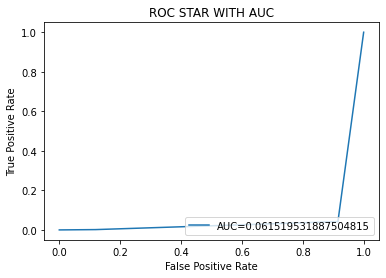

In [ ]:
#criando ROC curve

plt.title('ROC STAR WITH AUC')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
y_train_class = (y_train == 2) # Verdadeiro para galáxias, falso p td o resto
y_test_class = (y_test == 2)

In [ ]:
#definindo métrica

fpr, tpr, _ = metrics.roc_curve(y_test_class,  yhat)
auc = metrics.roc_auc_score(y_test_class, yhat)


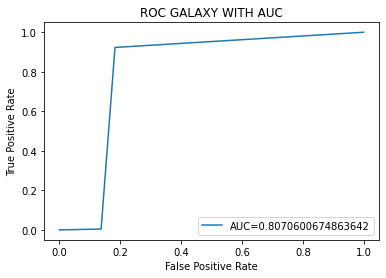

In [ ]:
#criando ROC curve

plt.title('ROC GALAXY WITH AUC')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
y_train_class = (y_train == 3) # Verdadeiro para quasares, falso p td o resto
y_test_class = (y_test == 3)

In [ ]:
#definindo métrica

fpr, tpr, _ = metrics.roc_curve(y_test_class, yhat)
auc = metrics.roc_auc_score(y_test_class, yhat)

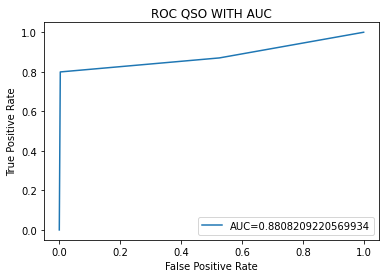

In [ ]:
#criando ROC curve

plt.title('ROC QSO WITH AUC')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

REFERÊNCIAS:

https://www.statology.org/plot-roc-curve-python/

https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/